In [1]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Cross-Validation RMSE Scores: [33474.20448522 23842.73850693 19273.80150414 18153.92788808
 18209.60277687]
Mean Cross-Validation RMSE: 22590.85503224832
Cross-Validation R^2 Scores: [0.83956097 0.91740125 0.92625664 0.92506752 0.92920286]
Mean Cross-Validation R^2: 0.9074978497847604
              Feature  Importance
5         OverallQual    0.484966
1           GrLivArea    0.156985
13        TotalBsmtSF    0.060675
7           YearBuilt    0.042531
10         BsmtFinSF1    0.034525
14           1stFlrSF    0.033646
27         GarageArea    0.032142
24         Fireplaces    0.022229
4             LotArea    0.016614
15           2ndFlrSF    0.015133
26         GarageCars    0.014345
186       BsmtQual_Ex    0.010466
8        YearRemodAdd    0.009382
6         OverallCond    0.007147
254  GarageFinish_Unf    0.006319
19           FullBath    0.005489
233    KitchenQual_TA    0.005062
171      ExterQual_Ex    0.003477
9          MasVnrArea    0.003182
223      CentralAir_N    0.002392


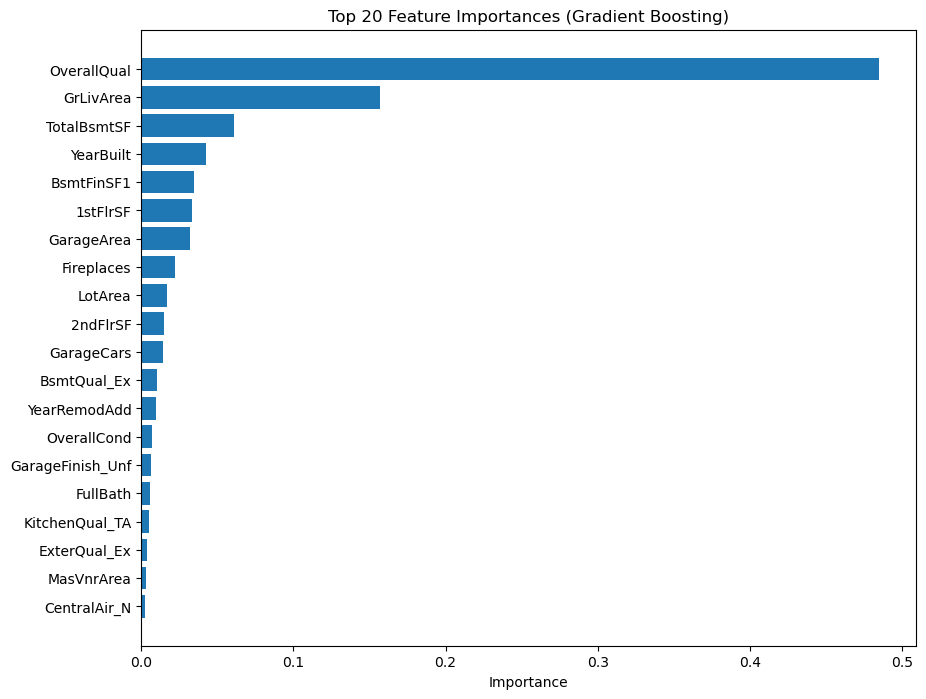

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Load the dataset
data = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# Define features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Gradient Boosting pipeline
pipeline_gradient_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Define a scorer for cross-validation
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Perform cross-validation for RMSE
cv_rmse_scores = cross_val_score(pipeline_gradient_boosting, X, y, cv=5, scoring=scorer)

# Perform cross-validation for R^2
cv_r2_scores = cross_val_score(pipeline_gradient_boosting, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f'Cross-Validation RMSE Scores: {-cv_rmse_scores}')
print(f'Mean Cross-Validation RMSE: {-cv_rmse_scores.mean()}')
print(f'Cross-Validation R^2 Scores: {cv_r2_scores}')
print(f'Mean Cross-Validation R^2: {cv_r2_scores.mean()}')


              Feature  Importance
5         OverallQual    0.484966
1           GrLivArea    0.156985
13        TotalBsmtSF    0.060675
7           YearBuilt    0.042531
10         BsmtFinSF1    0.034525
14           1stFlrSF    0.033646
27         GarageArea    0.032142
24         Fireplaces    0.022229
4             LotArea    0.016614
15           2ndFlrSF    0.015133
26         GarageCars    0.014345
186       BsmtQual_Ex    0.010466
8        YearRemodAdd    0.009382
6         OverallCond    0.007147
254  GarageFinish_Unf    0.006319
19           FullBath    0.005489
233    KitchenQual_TA    0.005062
171      ExterQual_Ex    0.003477
9          MasVnrArea    0.003182
223      CentralAir_N    0.002392


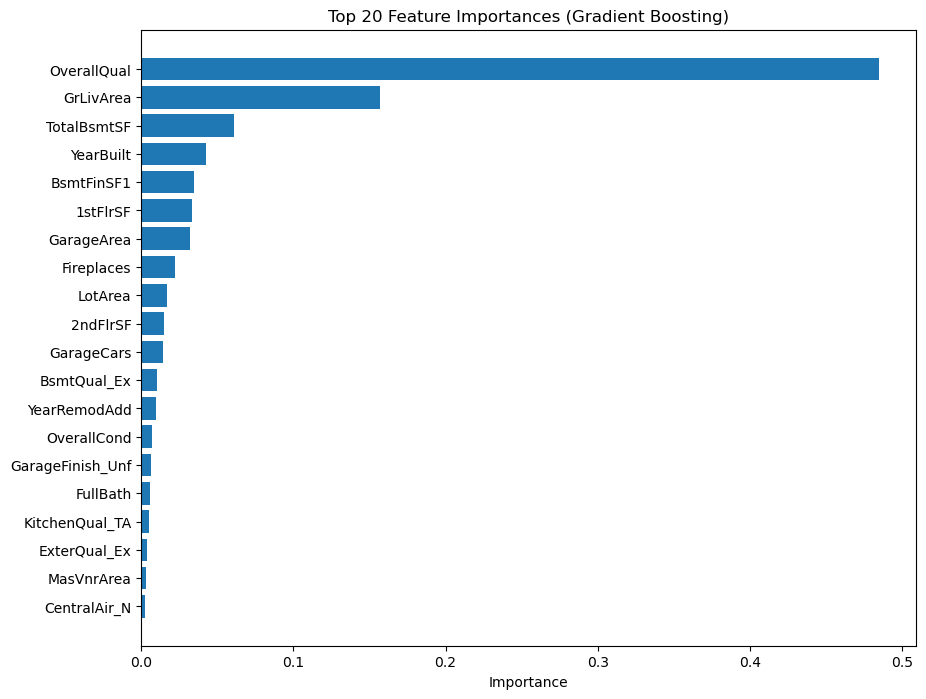

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the pipeline on the entire dataset
pipeline_gradient_boosting.fit(X, y)

# Extract feature importances
model = pipeline_gradient_boosting.named_steps['model']
importances = model.feature_importances_

# Get the feature names
onehot_encoder = pipeline_gradient_boosting.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
encoded_cat_features = onehot_encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, encoded_cat_features])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = feature_importance_df.head(20)

# Print the top 20 feature importances
print(top_20_features)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.show()


Cross-Validation RMSE Scores: [33909.53993597 25302.63645077 21268.48203485 19312.56948225
 18944.01608393]
Mean Cross-Validation RMSE: 23747.44879755698
Cross-Validation R^2 Scores: [0.83536079 0.90697648 0.91020314 0.91519743 0.92337705]
Mean Cross-Validation R^2: 0.8982229790153646
                   Feature  Importance
5              OverallQual    0.400484
14                1stFlrSF    0.038263
186            BsmtQual_Ex    0.035940
43             MSZoning_RM    0.034447
26              GarageCars    0.034383
254       GarageFinish_Unf    0.030898
223           CentralAir_N    0.029729
1                GrLivArea    0.028014
229         KitchenQual_Ex    0.026312
233         KitchenQual_TA    0.022487
24              Fireplaces    0.020749
173           ExterQual_Gd    0.014087
17            BsmtFullBath    0.012670
42             MSZoning_RL    0.012009
118      HouseStyle_1Story    0.010948
206       BsmtFinType2_ALQ    0.009940
13             TotalBsmtSF    0.009855
10          

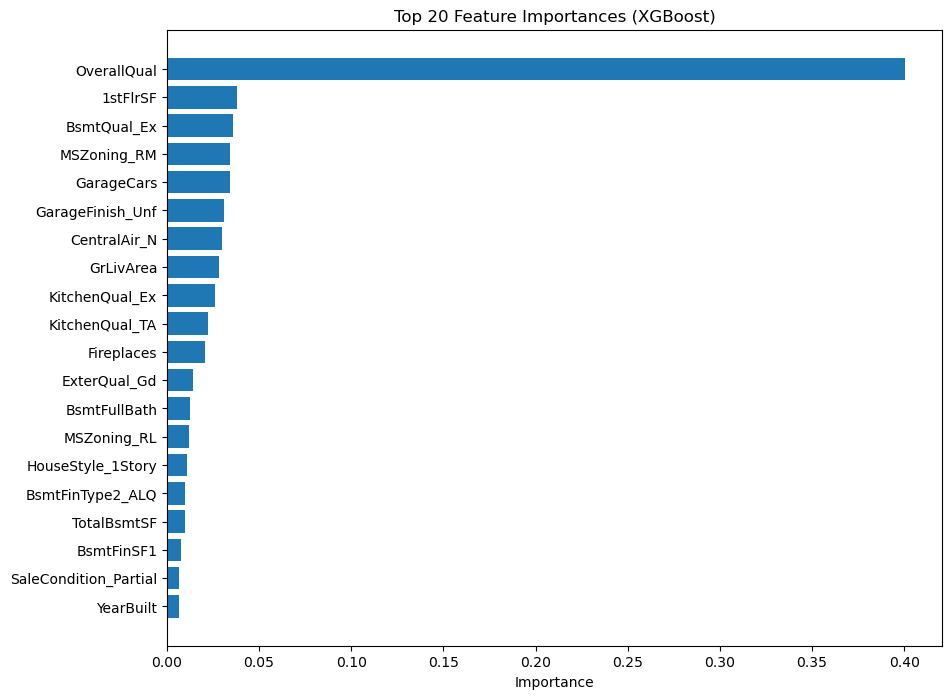

In [9]:

from xgboost import XGBRegressor



# Define features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the XGBoost pipeline
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
     ('model', XGBRegressor(n_estimators=100, random_state=42, reg_lambda=1))
])

# Define a scorer for cross-validation
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Perform cross-validation for RMSE
cv_rmse_scores = cross_val_score(pipeline_xgboost, X, y, cv=5, scoring=scorer)

# Perform cross-validation for R^2
cv_r2_scores = cross_val_score(pipeline_xgboost, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f'Cross-Validation RMSE Scores: {-cv_rmse_scores}')
print(f'Mean Cross-Validation RMSE: {-cv_rmse_scores.mean()}')
print(f'Cross-Validation R^2 Scores: {cv_r2_scores}')
print(f'Mean Cross-Validation R^2: {cv_r2_scores.mean()}')



                   Feature  Importance
5              OverallQual    0.400484
14                1stFlrSF    0.038263
186            BsmtQual_Ex    0.035940
43             MSZoning_RM    0.034447
26              GarageCars    0.034383
254       GarageFinish_Unf    0.030898
223           CentralAir_N    0.029729
1                GrLivArea    0.028014
229         KitchenQual_Ex    0.026312
233         KitchenQual_TA    0.022487
24              Fireplaces    0.020749
173           ExterQual_Gd    0.014087
17            BsmtFullBath    0.012670
42             MSZoning_RL    0.012009
118      HouseStyle_1Story    0.010948
206       BsmtFinType2_ALQ    0.009940
13             TotalBsmtSF    0.009855
10              BsmtFinSF1    0.007837
295  SaleCondition_Partial    0.006646
7                YearBuilt    0.006631


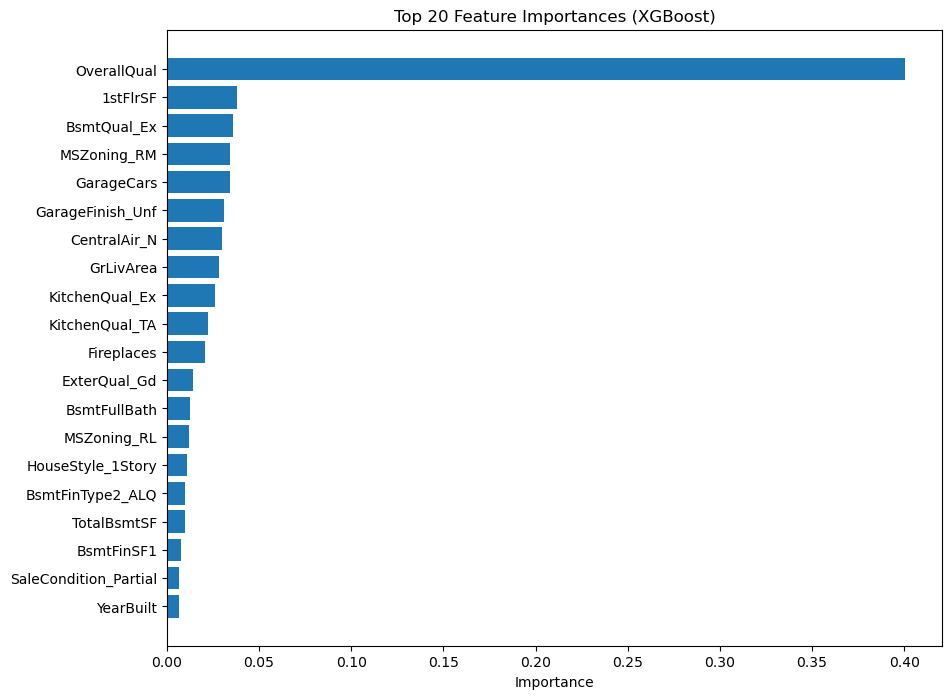

In [10]:
# Fit the pipeline on the entire dataset
pipeline_xgboost.fit(X, y)

# Extract feature importances
model = pipeline_xgboost.named_steps['model']
importances = model.feature_importances_

# Get the feature names
onehot_encoder = pipeline_xgboost.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
encoded_cat_features = onehot_encoder.get_feature_names_out(categorical_features)
all_features = np.concatenate([numeric_features, encoded_cat_features])

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 20 features
top_20_features = feature_importance_df.head(20)

# Print the top 20 feature importances
print(top_20_features)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()


In [6]:
#redo the xgboost with parameter tunning 

# Define features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the XGBoost pipeline
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__reg_lambda': [1, 5, 10],
    'model__reg_alpha': [0, 0.1, 0.5]
}

# Define the scorer for GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline_xgboost, param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)

# Perform GridSearchCV
grid_search.fit(X, y)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Perform cross-validation for RMSE and R^2 on the best model
cv_rmse_scores = cross_val_score(best_model, X, y, cv=5, scoring=scorer)
cv_r2_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f'Best Model Cross-Validation RMSE Scores: {-cv_rmse_scores}')
print(f'Best Model Mean Cross-Validation RMSE: {-cv_rmse_scores.mean()}')
print(f'Best Model Cross-Validation R^2 Scores: {cv_r2_scores}')
print(f'Best Model Mean Cross-Validation R^2: {cv_r2_scores.mean()}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__reg_alpha': 0.5, 'model__reg_lambda': 10}
Best Model Cross-Validation RMSE Scores: [28773.68887651 22887.03491575 17662.28566934 17218.93441175
 16965.48587382]
Best Model Mean Cross-Validation RMSE: 20701.485949433052
Best Model Cross-Validation R^2 Scores: [0.88145573 0.92389026 0.93807273 0.93258735 0.93854639]
Best Model Mean Cross-Validation R^2: 0.9229104900762675
